In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

#Data preprocessing using Python

#read dataset
df=pd.read_csv("building_inventory_preprocessing_assignment.csv")
df.head()



C:\Users\penpo\AppData\Local\Temp\ipykernel_17000\3097297584.py:8: DtypeWarning: Columns (1,40,44,47,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("building_inventory_preprocessing_assignment.csv")


,id,pid_long,cm_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,88905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
1,51137,1600083000,NaN,Single-Family,"Single-Family, 1915-1949",Residential,"< 25,000 sqft",1915-1949,5,EVERETT,...,f,t,f,f,t,t,f,f,f,4
2,18045,202560000,NaN,Single-Family,"Single-Family, Pre-1915",Residential,"< 25,000 sqft",Pre-1915,43,ESSEX,...,f,t,f,f,f,t,f,f,f,3
3,94001,2200577000,NaN,Convention/Assembly,"Convention/Assembly, 1950-1979",Public & Quasi-Public,"< 25,000 sqft",1950-1979,525,WESTERN,...,f,f,f,f,f,f,f,f,f,0
4,92940,1600058000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0


In [2]:
#Part 1: Data Formating
#We rename the column cm_id to condo_id - This is based on feild definitions which says that cm_id is Condo Main Id

df.rename(columns = {'cm_id':'condo_id'}, inplace = True)
df.head()


,id,pid_long,condo_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,88905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
1,51137,1600083000,NaN,Single-Family,"Single-Family, 1915-1949",Residential,"< 25,000 sqft",1915-1949,5,EVERETT,...,f,t,f,f,t,t,f,f,f,4
2,18045,202560000,NaN,Single-Family,"Single-Family, Pre-1915",Residential,"< 25,000 sqft",Pre-1915,43,ESSEX,...,f,t,f,f,f,t,f,f,f,3
3,94001,2200577000,NaN,Convention/Assembly,"Convention/Assembly, 1950-1979",Public & Quasi-Public,"< 25,000 sqft",1950-1979,525,WESTERN,...,f,f,f,f,f,f,f,f,f,0
4,92940,1600058000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0


In [3]:
#Part 2: Remove Columns

column_names = list(df.columns.values)
for column_names in df.columns:
    print(column_names)

id
pid_long
condo_id
building_typology
building_subtypology
use_class
sqft_class
year_built_class
st_num
st_name
st_name_suf
unit_num
zipcode
yr_built
land_sf
gross_area
living_area
sqft
num_floors
num_bldgs
units_res
units_com
units_mixed
ptype
ptype_list
lu
lu_list
assessor_category
assessor_description
own_occ
own_occ_list
owner_list
structure_class
structure_class_list
bldg_styl
bldg_styl_list
r_roof_typ
ext_fin
ext_fin_list
ext_cond_list
insulation_type
foundation_type
heat_typ
heat_typ_list
heating_system_fuel
ac
ac_list
ac_system_type
hot_water_system_fuel
electric_panel_info
has_pv
existing_ashp
existing_gshp
existing_shw
historic_district
landmark
flood
stormwater
last_major_renovation_date
total_site_energy_kbtu
perc_electricity
perc_gas
perc_steam
onsite_renewable_kwh
census_tract_number
ct_pop_disability
ct_pop_children_under_5
ct_pop_over_65
ct_pop_low_to_no_income
ct_pop_limited_english_proficiency
ct_pop_poc
ct_pop_med_illness
ct_perc_disability
ct_perc_children_under_5


In [4]:
#from the report we can see that pid and unit_num are unsupported so we can remove those

#drop columns
print("before dropping columns - Shape: ", df.shape)

before dropping columns - Shape:  (98930, 107)


In [5]:
df.drop(columns=["unit_num","existing_gshp"], inplace=True)

In [6]:
print("before dropping columns - Shape: ", df.shape)

before dropping columns - Shape:  (98930, 105)


In [7]:
#Part 3: Outliers or extreme values 
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR = q3-q1
    outliers=df[((df<q1-1.5*IQR) | (df>q3+1.5*IQR))]
    return outliers

df_outliers = find_outliers_IQR(df['sqft'])

print("number of outliers: " + str(len(df_outliers)))
print("Max outlier value: " + str(df_outliers.max()))
print("Min outlier value: " + str(df_outliers.min()))

number of outliers: 8042
Max outlier value: 1976650.0
Min outlier value: 6748.0


In [8]:
#function for removing Outliers with IQR

def remove_outliers_IQR(df, col):
    q1 = np.nanpercentile(df[col], 25, interpolation = 'midpoint')
    q3 = np.nanpercentile(df[col], 75, interpolation = 'midpoint')
    IQR = q3 - q1
    print("Old Shape: ", df.shape)
    upper = np.where(df[col] >= (q3+1.5*IQR))
    lower = np.where(df[col] <= (q1-1.5*IQR))
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    print("New Shape: ", df.shape)

In [9]:
remove_outliers_IQR(df,'sqft')

Old Shape:  (98930, 105)
New Shape:  (90887, 105)


In [10]:
df

,id,pid_long,condo_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,88905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
1,51137,1600083000,NaN,Single-Family,"Single-Family, 1915-1949",Residential,"< 25,000 sqft",1915-1949,5,EVERETT,...,f,t,f,f,t,t,f,f,f,4
2,18045,202560000,NaN,Single-Family,"Single-Family, Pre-1915",Residential,"< 25,000 sqft",Pre-1915,43,ESSEX,...,f,t,f,f,f,t,f,f,f,3
4,92940,1600058000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
5,29815,2002853001,NaN,Vacant,Vacant,Vacant,NaN,NaN,,SEARLE,...,f,f,f,f,f,f,f,f,f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98925,66236,1001363000,1.001363e+09,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
98926,68980,2007422000,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,19,AVALON,...,f,f,f,f,f,f,f,f,f,0
98927,95554,2203167050,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,46,GERRISH,...,f,f,f,f,f,f,f,f,f,0
98928,58753,200894010,2.008940e+08,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0


In [11]:
#Part 4: Missing and NULL data values 

df['building_typology']=df['building_typology'].fillna('No Data')
df.head()

,id,pid_long,condo_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,88905,NaN,NaN,No Data,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
1,51137,1600083000,NaN,Single-Family,"Single-Family, 1915-1949",Residential,"< 25,000 sqft",1915-1949,5,EVERETT,...,f,t,f,f,t,t,f,f,f,4
2,18045,202560000,NaN,Single-Family,"Single-Family, Pre-1915",Residential,"< 25,000 sqft",Pre-1915,43,ESSEX,...,f,t,f,f,f,t,f,f,f,3
4,92940,1600058000,NaN,No Data,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
5,29815,2002853001,NaN,Vacant,Vacant,Vacant,NaN,NaN,,SEARLE,...,f,f,f,f,f,f,f,f,f,0


In [12]:
df.isnull()


,id,pid_long,condo_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,False,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98925,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
98926,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98927,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98928,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [13]:
for c in df.columns:
    miss = df[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

id has NO missing value!
pid_long has 19 missing value(s)
condo_id has 83165 missing value(s)
building_typology has NO missing value!
building_subtypology has 7692 missing value(s)
use_class has 201 missing value(s)
sqft_class has 14155 missing value(s)
year_built_class has 14328 missing value(s)
st_num has 7876 missing value(s)
st_name has 7876 missing value(s)
st_name_suf has 7948 missing value(s)
zipcode has 7876 missing value(s)
yr_built has 14328 missing value(s)
land_sf has 171 missing value(s)
gross_area has 567 missing value(s)
living_area has 567 missing value(s)
sqft has 6353 missing value(s)
num_floors has 13952 missing value(s)
num_bldgs has 5297 missing value(s)
units_res has 18576 missing value(s)
units_com has 83122 missing value(s)
units_mixed has 83160 missing value(s)
ptype has 154 missing value(s)
ptype_list has 154 missing value(s)
lu has 154 missing value(s)
lu_list has 154 missing value(s)
assessor_category has 173 missing value(s)
assessor_description has 173 mis

In [14]:
df.shape

(90887, 105)

In [2]:
df.dropna(axis=0, thresh=1000, inplace=True)

NameError: name 'data' is not defined

In [16]:
df.shape

(90887, 92)

In [17]:
#Part 5: Duplicate records

df.duplicated(subset=["id"])
duplicate_drop = df.drop_duplicates(subset=["id"])
duplicate_drop

,id,pid_long,condo_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,88905,NaN,NaN,No Data,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
1,51137,1600083000,NaN,Single-Family,"Single-Family, 1915-1949",Residential,"< 25,000 sqft",1915-1949,5,EVERETT,...,f,t,f,f,t,t,f,f,f,4
2,18045,202560000,NaN,Single-Family,"Single-Family, Pre-1915",Residential,"< 25,000 sqft",Pre-1915,43,ESSEX,...,f,t,f,f,f,t,f,f,f,3
4,92940,1600058000,NaN,No Data,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
5,29815,2002853001,NaN,Vacant,Vacant,Vacant,NaN,NaN,,SEARLE,...,f,f,f,f,f,f,f,f,f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98925,66236,1001363000,1.001363e+09,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
98926,68980,2007422000,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,19,AVALON,...,f,f,f,f,f,f,f,f,f,0
98927,95554,2203167050,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,46,GERRISH,...,f,f,f,f,f,f,f,f,f,0
98928,58753,200894010,2.008940e+08,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0


In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df

,id,pid_long,condo_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,88905,NaN,NaN,No Data,NaN,NaN,NaN,NaN,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
1,51137,1600083000,NaN,Single-Family,"Single-Family, 1915-1949",Residential,"< 25,000 sqft",1915-1949,5,EVERETT,...,f,t,f,f,t,t,f,f,f,4
2,18045,202560000,NaN,Single-Family,"Single-Family, Pre-1915",Residential,"< 25,000 sqft",Pre-1915,43,ESSEX,...,f,t,f,f,f,t,f,f,f,3
3,75767,1807950000,NaN,Vacant,Vacant,Vacant,NaN,NaN,,HYDE PARK,...,f,f,f,f,f,f,f,f,f,0
4,89092,902908040,NaN,No Data,NaN,Public & Quasi-Public,NaN,NaN,,TREMONT,...,f,f,f,f,f,f,f,f,f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90830,66236,1001363000,1.001363e+09,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0
90831,68980,2007422000,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,19,AVALON,...,f,f,f,f,f,f,f,f,f,0
90832,95554,2203167050,NaN,Single-Family,"Single-Family, 1980-present",Residential,"< 25,000 sqft",1980-present,46,GERRISH,...,f,f,f,f,f,f,f,f,f,0
90833,58753,200894010,2.008940e+08,Multi-Family (2 units),"Multi-Family (2 units), 1980-present",Residential,"< 25,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,f,0


In [28]:
#invalid data

def char_finder(df, col):
    cnt=0
    print(col)
    for row in df[col]:
        try:
            if row != '':
                float(row)
            pass
        except:
            print(df.loc[cnt, col], "-> at row:"+str(cnt))
        cnt+=1

In [29]:
char_finder(df,'st_num')

st_num
    -> at row:3
  -> at row:4
    -> at row:6
    -> at row:7
  -> at row:8
  -> at row:11
    -> at row:20
28 30 -> at row:21
    -> at row:22
    -> at row:23
    -> at row:27
    -> at row:30
    -> at row:36
    -> at row:39
    -> at row:40
489 491 -> at row:42
    -> at row:46
    -> at row:47
    -> at row:48
  -> at row:49
    -> at row:51
    -> at row:52
    -> at row:60
    -> at row:67
    -> at row:77
    -> at row:79
    -> at row:82
    -> at row:89
76 78 -> at row:90
    -> at row:94
1325 -1345 -> at row:95
    -> at row:96
    -> at row:102
182 180 -> at row:107
    -> at row:109
    -> at row:110
    -> at row:111
    -> at row:115
    -> at row:117
    -> at row:118
    -> at row:119
    -> at row:122
    -> at row:123
    -> at row:127
82 84 -> at row:141
85 87 -> at row:147
839 A839 -> at row:156
71 73 -> at row:174
    -> at row:175
142 140 -> at row:184
12 14 -> at row:192
    -> at row:197
702 700 -> at row:207
113 111 -> at row:210
74 76 -> at row:214
10

    -> at row:8976
48 46 -> at row:8977
15 17 -> at row:8986
113 115 -> at row:8997
63 65 -> at row:9044
39 41 -> at row:9051
181 183 -> at row:9052
16 14 -> at row:9056
101 103 -> at row:9059
88 A88 -> at row:9066
238 240 -> at row:9070
31 33 -> at row:9109
42 40 -> at row:9117
99 -101 -> at row:9119
1 3 -> at row:9123
192 194 -> at row:9124
9 R -> at row:9129
8-Jun -> at row:9164
    -> at row:9173
40 42 -> at row:9181
76 74 -> at row:9184
50 52 -> at row:9189
85 87 -> at row:9194
51 53 -> at row:9228
120 122 -> at row:9232
2 4 -> at row:9233
70 72 -> at row:9266
40 42 -> at row:9280
40 38 -> at row:9286
7 9 -> at row:9291
221 223 -> at row:9292
41 43 -> at row:9296
315 315A -> at row:9300
43 A -> at row:9306
92 94 -> at row:9332
101 HF101 -> at row:9339
145 147 -> at row:9344
9 11 -> at row:9358
64 62 -> at row:9368
6 8 -> at row:9369
    -> at row:9428
    -> at row:9448
659 R -> at row:9610
    -> at row:9621
12 14 -> at row:9627
95 95A -> at row:9677
12 14 -> at row:9712
126 128 

190 188 -> at row:21487
68 66 -> at row:21488
19 21 -> at row:21489
8 6 -> at row:21493
5 7 -> at row:21495
28 30 -> at row:21497
39 41 -> at row:21499
92 90 -> at row:21500
25 A25 -> at row:21504
5 7 -> at row:21513
30 32 -> at row:21531
23 25 -> at row:21541
5 7 -> at row:21543
12 10 -> at row:21552
14 16 -> at row:21558
24 26 -> at row:21560
6 8 -> at row:21573
9 11 -> at row:21576
73 75 -> at row:21587
105 107 -> at row:21589
93 95 -> at row:21599
43 45 -> at row:21605
9 11 -> at row:21606
27 29 -> at row:21608
36 38 -> at row:21609
11 11A -> at row:21610
18 20 -> at row:21611
16 18 -> at row:21616
19 19A -> at row:21619
31 33 -> at row:21620
107 109 -> at row:21624
16 14 -> at row:21628
18 20 -> at row:21630
14 16 -> at row:21646
18 20 -> at row:21658
77 79 -> at row:21661
123 125 -> at row:21663
53 55 -> at row:21670
263 265 -> at row:21671
15 17 -> at row:21678
65 67 -> at row:21679
87 89 -> at row:21680
15 17 -> at row:21683
9 11 -> at row:21685
30 A30 -> at row:21689
64 64A ->

234 236 -> at row:27605
75 77 -> at row:27609
6 6A -> at row:27620
294 296 -> at row:27624
47 49 -> at row:27632
85 87 -> at row:27634
10 12 -> at row:27646
42 44 -> at row:27648
4 2 -> at row:27649
456 458 -> at row:27668
20 18 -> at row:27673
98 96 -> at row:27674
15 17 -> at row:27676
61 63 -> at row:27677
8 10 -> at row:27681
106 108 -> at row:27705
5 7 -> at row:27706
18 20 -> at row:27709
61 63 -> at row:27710
30 32 -> at row:27714
27 29 -> at row:27715
79 81 -> at row:27716
17 19 -> at row:27724
48 -50 -> at row:27727
15 17 -> at row:27729
27 27A -> at row:27732
36 38 -> at row:27734
176 178 -> at row:27743
25 27 -> at row:27751
12 14 -> at row:27759
14 16 -> at row:27768
10 12 -> at row:27771
97 99 -> at row:27774
997 999 -> at row:27776
232 234 -> at row:27779
114 116 -> at row:27782
40 40A -> at row:27784
35 37 -> at row:27785
94 96 -> at row:27788
17 19 -> at row:27800
37 37A -> at row:27818
5 7 -> at row:27833
307 309 -> at row:27848
361 363 -> at row:27855
123 125 -> at ro

294 292 -> at row:39269
81 79 -> at row:39274
94 92 -> at row:39304
566 568 -> at row:39326
90 94 -> at row:39330
745 A745 -> at row:39332
136 138 -> at row:39337
38 A38 -> at row:39374
167 A167 -> at row:39388
763 765 -> at row:39389
19 21 -> at row:39393
129 129A -> at row:39401
655 657 -> at row:39403
14 R14 -> at row:39422
682 682HF -> at row:39431
837 HF837 -> at row:39444
863 HF863 -> at row:39445
1077 1079 -> at row:39450
10 12 -> at row:39459
879 881 -> at row:39466
125 127 -> at row:39482
10 12 -> at row:39491
74 72 -> at row:39492
301 303 -> at row:39505
98 96 -> at row:39506
532 530 -> at row:39510
4 6 -> at row:39530
67 69 -> at row:39533
891 893 -> at row:39534
19 21 -> at row:39537
10 12 -> at row:39561
748 HF748 -> at row:39567
21 23 -> at row:39579
732 734 -> at row:39601
45 46 -> at row:39604
434 432 -> at row:39641
18 18A -> at row:39649
50 52 -> at row:39669
883 885 -> at row:39672
139 141 -> at row:39674
123 125 -> at row:39681
127 129 -> at row:39682
119 121 -> at 

2:00 AM -> at row:47850
18 16 -> at row:47851
24 26 -> at row:47855
91 91A -> at row:47867
23 25 -> at row:47878
16 18 -> at row:47886
55 55A -> at row:47892
82 80 -> at row:47897
29 31 -> at row:47904
67 69 -> at row:47924
49 51 -> at row:47930
86 88 -> at row:47935
70 72 -> at row:47937
23 25 -> at row:47941
16 14 -> at row:47949
53 55 -> at row:47950
90 90 HF -> at row:47954
41 41R -> at row:47965
25 27 -> at row:47969
72 70 -> at row:47982
36 38 -> at row:47984
225 227 -> at row:47985
38 X -> at row:47997
28 30 -> at row:48012
237 R237 -> at row:48014
594 592 -> at row:48039
341 343 -> at row:48042
58 60 -> at row:48050
5:00 AM -> at row:48052
1 3 -> at row:48056
80 80A -> at row:48059
11 11A -> at row:48084
606 604 -> at row:48085
41 R41 -> at row:48092
317 317R -> at row:48112
90 92 -> at row:48114
276 272 -> at row:48116
6 8 -> at row:48117
1630 1632 -> at row:48121
248 250 -> at row:48135
221 R221 -> at row:48139
1780 1782 -> at row:48159
211 211R -> at row:48167
141 R -> at ro

    -> at row:54929
23 25 -> at row:54941
21  X -> at row:54968
    -> at row:54987
5 5A -> at row:55038
34 34A -> at row:55144
    -> at row:55184
19 21 -> at row:55218
    -> at row:55220
    -> at row:55229
    -> at row:55242
    -> at row:55248
  -> at row:55292
    -> at row:55334
    -> at row:55347
    -> at row:55377
    -> at row:55426
    -> at row:55454
18 20 -> at row:55477
    -> at row:55497
    -> at row:55516
708 706 -> at row:55518
    -> at row:55524
    -> at row:55561
    -> at row:55578
    -> at row:55580
26 28 -> at row:55629
    -> at row:55677
38 40 -> at row:55695
21 A -> at row:55712
    -> at row:55718
682 684 -> at row:55721
    -> at row:55726
    -> at row:55754
    -> at row:55837
    -> at row:55878
    -> at row:55881
3 3A -> at row:55905
    -> at row:55909
    -> at row:55954
466 474 -> at row:56009
    -> at row:56015
    -> at row:56084
26 28 -> at row:56106
86 88 -> at row:56112
11 13 -> at row:56121
290 292 -> at row:56134
    -> at row:56157
74

    -> at row:65684
242 A242 -> at row:65685
127 129 -> at row:65689
    -> at row:65695
    -> at row:65698
108 106 -> at row:65703
    -> at row:65710
    -> at row:65713
27 -29 -> at row:65714
24 28 -> at row:65717
    -> at row:65718
  -> at row:65720
    -> at row:65723
    -> at row:65746
32 34 -> at row:65770
    -> at row:65776
    -> at row:65779
56 58 -> at row:65787
115 B -> at row:65788
132 128A -> at row:65793
40 42 -> at row:65796
115 A -> at row:65799
36 38 -> at row:65811
119 B -> at row:65816
1/3/2005 -> at row:65818
26 26A -> at row:65826
37 39 -> at row:65836
    -> at row:65838
    -> at row:65840
    -> at row:65841
1528 1530 -> at row:65843
   -> at row:65856
    -> at row:65860
    -> at row:65865
1 3 -> at row:65868
6 8 -> at row:65869
16 18 -> at row:65870
149 155 -> at row:65871
    -> at row:65877
    -> at row:65887
    -> at row:65892
6 8 -> at row:65895
810 810A -> at row:65896
    -> at row:65899
    -> at row:65900
118 124 -> at row:65901
    -> at row:6

    -> at row:70834
    -> at row:70836
    -> at row:70838
    -> at row:70839
2:00 AM -> at row:70840
    -> at row:70841
    -> at row:70842
    -> at row:70843
    -> at row:70844
    -> at row:70845
    -> at row:70846
    -> at row:70847
300 P -> at row:70849
    -> at row:70854
8 R -> at row:70855
    -> at row:70856
    -> at row:70857
509 511 -> at row:70859
    -> at row:70860
    -> at row:70861
1909 1913 -> at row:70864
    -> at row:70865
    -> at row:70866
    -> at row:70867
    -> at row:70868
320 322 -> at row:70869
    -> at row:70871
3157 3159 -> at row:70872
266 264 -> at row:70873
    -> at row:70876
    -> at row:70877
    -> at row:70878
    -> at row:70879
    -> at row:70880
    -> at row:70882
    -> at row:70883
  -> at row:70884
    -> at row:70886
    -> at row:70888
    -> at row:70890
12 14 -> at row:70891
    -> at row:70892
    -> at row:70896
    -> at row:70898
24 -26 -> at row:70899
    -> at row:70901
42 44 -> at row:70902
36 R38R -> at row:70903
 

    -> at row:73025
    -> at row:73026
    -> at row:73027
    -> at row:73029
    -> at row:73031
17 21 -> at row:73032
    -> at row:73034
    -> at row:73035
    -> at row:73038
    -> at row:73043
65 R -> at row:73044
    -> at row:73047
    -> at row:73048
9 15 -> at row:73049
    -> at row:73050
1047 1049A -> at row:73051
    -> at row:73052
88 86 -> at row:73053
    -> at row:73054
    -> at row:73055
    -> at row:73057
    -> at row:73060
    -> at row:73062
    -> at row:73063
    -> at row:73064
    -> at row:73066
22 24 -> at row:73070
    -> at row:73072
    -> at row:73073
    -> at row:73074
    -> at row:73075
  -> at row:73077
    -> at row:73078
    -> at row:73080
  -> at row:73081
    -> at row:73082
    -> at row:73083
    -> at row:73084
1894 1884 -> at row:73086
    -> at row:73087
    -> at row:73089
    -> at row:73090
    -> at row:73091
    -> at row:73092
101 103 -> at row:73093
 NES -> at row:73094
    -> at row:73095
    -> at row:73096
    -> at row:7309

    -> at row:74798
87 89 -> at row:74799
21 23 -> at row:74800
  -> at row:74801
    -> at row:74803
    -> at row:74807
    -> at row:74808
    -> at row:74809
  -> at row:74811
    -> at row:74813
  -> at row:74814
    -> at row:74815
  -> at row:74816
    -> at row:74817
    -> at row:74818
    -> at row:74821
  -> at row:74822
    -> at row:74823
    -> at row:74825
    -> at row:74826
    -> at row:74828
    -> at row:74830
    -> at row:74831
    -> at row:74834
    -> at row:74835
    -> at row:74836
    -> at row:74837
    -> at row:74838
1142 1140 -> at row:74839
    -> at row:74840
    -> at row:74841
    -> at row:74842
    -> at row:74843
    -> at row:74845
14 X -> at row:74846
    -> at row:74847
  -> at row:74848
    -> at row:74850
    -> at row:74851
  -> at row:74852
    -> at row:74853
    -> at row:74855
    -> at row:74856
    -> at row:74861
    -> at row:74863
    -> at row:74864
    -> at row:74865
    -> at row:74866
10 A10B -> at row:74867
    -> at row:74869

    -> at row:76261
    -> at row:76262
    -> at row:76264
    -> at row:76265
    -> at row:76267
    -> at row:76269
    -> at row:76270
    -> at row:76271
848 850A -> at row:76272
    -> at row:76274
32 34 -> at row:76277
90 92 -> at row:76279
    -> at row:76281
  -> at row:76282
1104 1092 -> at row:76283
230 232A -> at row:76285
    -> at row:76287
    -> at row:76288
    -> at row:76290
    -> at row:76292
    -> at row:76293
    -> at row:76294
    -> at row:76295
    -> at row:76296
2 20 -> at row:76297
    -> at row:76298
    -> at row:76299
10 18 -> at row:76300
    -> at row:76301
    -> at row:76302
27 29 -> at row:76305
157 157A -> at row:76309
    -> at row:76311
    -> at row:76312
114 112 -> at row:76313
431 433 -> at row:76314
2821 2823 -> at row:76315
    -> at row:76316
    -> at row:76317
    -> at row:76320
    -> at row:76321
    -> at row:76323
    -> at row:76325
    -> at row:76326
54 56 -> at row:76327
1311 1321 -> at row:76329
    -> at row:76331
    -> at 

    -> at row:77852
120 -140 -> at row:77853
    -> at row:77854
    -> at row:77855
  -> at row:77856
    -> at row:77857
    -> at row:77858
2673 2677 -> at row:77859
12-Jun -> at row:77860
71 77 -> at row:77861
    -> at row:77863
    -> at row:77864
445 447 -> at row:77866
   -> at row:77868
80 82 -> at row:77869
    -> at row:77870
209 219 -> at row:77872
225 -227 -> at row:77873
761 773 -> at row:77874
    -> at row:77875
    -> at row:77876
    -> at row:77877
    -> at row:77881
    -> at row:77882
21 P -> at row:77884
    -> at row:77885
68 70 -> at row:77887
    -> at row:77889
802 804 -> at row:77892
    -> at row:77893
132 140 -> at row:77895
68 70 -> at row:77896
174 176 -> at row:77897
7 9 -> at row:77900
    -> at row:77905
    -> at row:77907
  -> at row:77908
    -> at row:77911
810 812 -> at row:77912
    -> at row:77913
    -> at row:77915
    -> at row:77919
    -> at row:77922
    -> at row:77924
47 49 -> at row:77925
34 36 -> at row:77926
    -> at row:77927
    -

    -> at row:79371
    -> at row:79372
    -> at row:79373
    -> at row:79374
    -> at row:79375
    -> at row:79376
    -> at row:79377
4337 4341 -> at row:79378
    -> at row:79379
    -> at row:79382
    -> at row:79383
    -> at row:79384
    -> at row:79385
    -> at row:79386
    -> at row:79387
    -> at row:79389
    -> at row:79390
    -> at row:79391
    -> at row:79392
  -> at row:79393
    -> at row:79395
    -> at row:79396
33 35 -> at row:79397
    -> at row:79398
1741 1747 -> at row:79399
    -> at row:79400
  -> at row:79402
    -> at row:79403
    -> at row:79404
    -> at row:79405
    -> at row:79406
  -> at row:79407
    -> at row:79408
    -> at row:79409
    -> at row:79410
    -> at row:79411
    -> at row:79412
    -> at row:79413
    -> at row:79414
    -> at row:79415
    -> at row:79416
    -> at row:79417
    -> at row:79418
    -> at row:79419
    -> at row:79420
    -> at row:79421
    -> at row:79423
    -> at row:79424
    -> at row:79426
    -> at ro

    -> at row:80919
    -> at row:80920
    -> at row:80921
20 22 -> at row:80922
7 9 -> at row:80923
235 239 -> at row:80925
    -> at row:80928
    -> at row:80929
    -> at row:80930
    -> at row:80931
    -> at row:80932
 NES -> at row:80934
584 588 -> at row:80935
279 285 -> at row:80936
    -> at row:80940
    -> at row:80941
12 24 -> at row:80943
    -> at row:80944
    -> at row:80946
    -> at row:80947
    -> at row:80948
    -> at row:80949
    -> at row:80950
    -> at row:80951
    -> at row:80952
    -> at row:80953
    -> at row:80954
    -> at row:80955
87 89 -> at row:80957
    -> at row:80959
    -> at row:80961
11 5 -> at row:80962
    -> at row:80966
183 185 -> at row:80967
337 A 337B -> at row:80968
    -> at row:80972
  309R -> at row:80973
    -> at row:80974
    -> at row:80976
    -> at row:80977
    -> at row:80978
    -> at row:80981
    -> at row:80983
    -> at row:80984
    -> at row:80986
    -> at row:80987
    -> at row:80990
    -> at row:80991
36 38 

    -> at row:83977
    -> at row:83980
    -> at row:83982
    -> at row:83985
    -> at row:83986
    -> at row:83987
    -> at row:83988
    -> at row:83990
  -> at row:83991
123 127 -> at row:83992
    -> at row:83993
    -> at row:83998
    -> at row:84001
106 102 -> at row:84002
    -> at row:84004
    -> at row:84008
14 16 -> at row:84011
    -> at row:84013
    -> at row:84014
    -> at row:84018
217 219 -> at row:84020
28 34 -> at row:84022
    -> at row:84023
22 16 -> at row:84024
    -> at row:84025
152 154 -> at row:84026
    -> at row:84030
16 18 -> at row:84031
    -> at row:84032
134 140 -> at row:84036
    -> at row:84039
178 176 -> at row:84042
16 24 -> at row:84047
    -> at row:84048
    -> at row:84049
    -> at row:84052
    -> at row:84053
    -> at row:84054
250 -256 -> at row:84055
101 A101 -> at row:84056
29 31 -> at row:84058
58 56 -> at row:84061
  -> at row:84064
    -> at row:84065
384 384A -> at row:84066
55 59 -> at row:84067
78 80A -> at row:84070
    ->

    -> at row:86083
    -> at row:86084
    -> at row:86086
482 484 -> at row:86087
    -> at row:86088
    -> at row:86089
    -> at row:86090
    -> at row:86091
193 A -> at row:86093
20 22 -> at row:86095
    -> at row:86096
    -> at row:86100
    -> at row:86102
    -> at row:86106
3710 A3710 -> at row:86109
  -> at row:86110
    -> at row:86111
51 -55 -> at row:86115
172 170 -> at row:86117
    -> at row:86118
24 A -> at row:86119
    -> at row:86120
155 159 -> at row:86121
    -> at row:86122
379 381 -> at row:86124
    -> at row:86130
383 385 -> at row:86131
911 913 -> at row:86132
933 933A -> at row:86133
949 947 -> at row:86135
52 54 -> at row:86136
550 556 -> at row:86137
    -> at row:86138
    -> at row:86139
    -> at row:86140
    -> at row:86141
797 799 -> at row:86142
109 115 -> at row:86143
    -> at row:86146
    -> at row:86148
    -> at row:86149
    -> at row:86152
3712 3716 -> at row:86153
    -> at row:86154
    -> at row:86156
172 R -> at row:86158
    -> at ro

    -> at row:87779
    -> at row:87780
    -> at row:87782
    -> at row:87786
    -> at row:87788
24 26 -> at row:87789
    -> at row:87790
    -> at row:87791
106 110 -> at row:87792
    -> at row:87793
24 24A -> at row:87795
288 288A -> at row:87796
305 307 -> at row:87797
204 204A -> at row:87799
    -> at row:87802
    -> at row:87803
18 18A -> at row:87807
77 77A -> at row:87808
    -> at row:87809
    -> at row:87810
    -> at row:87813
    -> at row:87815
    -> at row:87816
  -> at row:87817
    -> at row:87819
    -> at row:87820
    -> at row:87821
    -> at row:87824
    -> at row:87825
    -> at row:87828
269 271 -> at row:87829
    -> at row:87831
    -> at row:87832
    -> at row:87833
48 50 -> at row:87836
799 801 -> at row:87837
    -> at row:87838
367 367A -> at row:87839
    -> at row:87841
10 12 -> at row:87842
390 390A -> at row:87844
    -> at row:87845
    -> at row:87849
    -> at row:87850
845 847 -> at row:87851
    -> at row:87857
    -> at row:87858
    -> 

    -> at row:89616
    -> at row:89620
    -> at row:89621
13 15 -> at row:89622
    -> at row:89623
  R -> at row:89624
    -> at row:89626
    -> at row:89627
  -> at row:89630
    -> at row:89631
    -> at row:89632
    -> at row:89633
216 218 -> at row:89635
    -> at row:89637
    -> at row:89638
    -> at row:89641
    -> at row:89642
113 117 -> at row:89643
    -> at row:89645
    -> at row:89647
    -> at row:89648
13 15 -> at row:89650
    -> at row:89651
33 31 -> at row:89653
    -> at row:89656
  -> at row:89659
    -> at row:89660
    -> at row:89662
314 A318 -> at row:89663
    -> at row:89664
361 361A -> at row:89666
18 22 -> at row:89668
75 HF -> at row:89671
493 493A -> at row:89672
502 R -> at row:89675
    -> at row:89676
    -> at row:89679
    -> at row:89680
81 87 -> at row:89681
    -> at row:89682
655 A655 -> at row:89683
    -> at row:89684
614 616 -> at row:89686
    -> at row:89688
    -> at row:89689
740 742 -> at row:89690
110 112A -> at row:89691
    -> at

In [30]:
def char_fixer(data_frame, col):
    cnt=0
    for row in data_frame[col]:
        try:
            float(row)
            pass
        except ValueError:
            data_frame.drop([cnt], inplace=True) 
        cnt+=1
    data_frame[col] = data_frame[col].astype('float64', errors='raise')
    data_frame.reset_index(drop=True, inplace=True)

In [31]:
char_fixer(df,'st_num')

KeyboardInterrupt: 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\penpo\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\penpo\AppData\Roaming\Python\Python39\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
C:\Users\penpo\AppData\Roaming\Python\Python39\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (93).')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

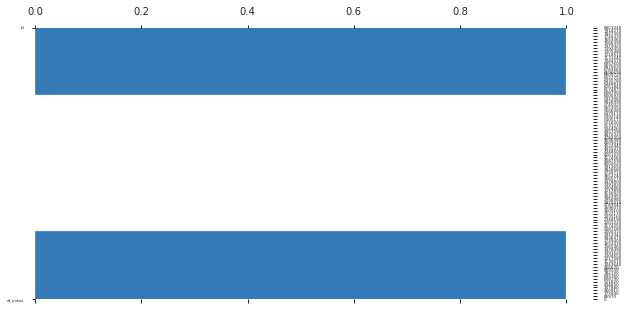

In [32]:
profile = df.profile_report(title='Data Preprocessing Assignment Report')
profile.to_file("report_preprocessingassignment.html")